# jammer
## 06- `star_marley.py`  on Gl570D
### II. Run01 success


In [1]:
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [2]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

```bash
gully at gigayear in ~/GitHub/jammer/sf/Gl570D/output/marley_grid/run01 on master [!]
$ $jammer/code/star_marley.py --samples=5000 --incremental_save=10
keeping grid as is
Using the user defined prior in $jammer/sf/Gl570D/user_prior.py
2017 Apr 24,12:10 PM: 9/5000 = 0.2%
2017 Apr 24,12:11 PM: 19/5000 = 0.4%
2017 Apr 24,12:11 PM: 29/5000 = 0.6%
2017 Apr 24,12:11 PM: 39/5000 = 0.8%
2017 Apr 24,12:11 PM: 49/5000 = 1.0%
[...]
2017 Apr 24, 1:33 PM: 4979/5000 = 99.6%
2017 Apr 24, 1:33 PM: 4989/5000 = 99.8%
2017 Apr 24, 1:33 PM: 4999/5000 = 100.0%
The end.
```

In [3]:
ws = np.load("../sf/Gl570D/output/marley_grid/run01/temp_emcee_chain.npy")

In [4]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

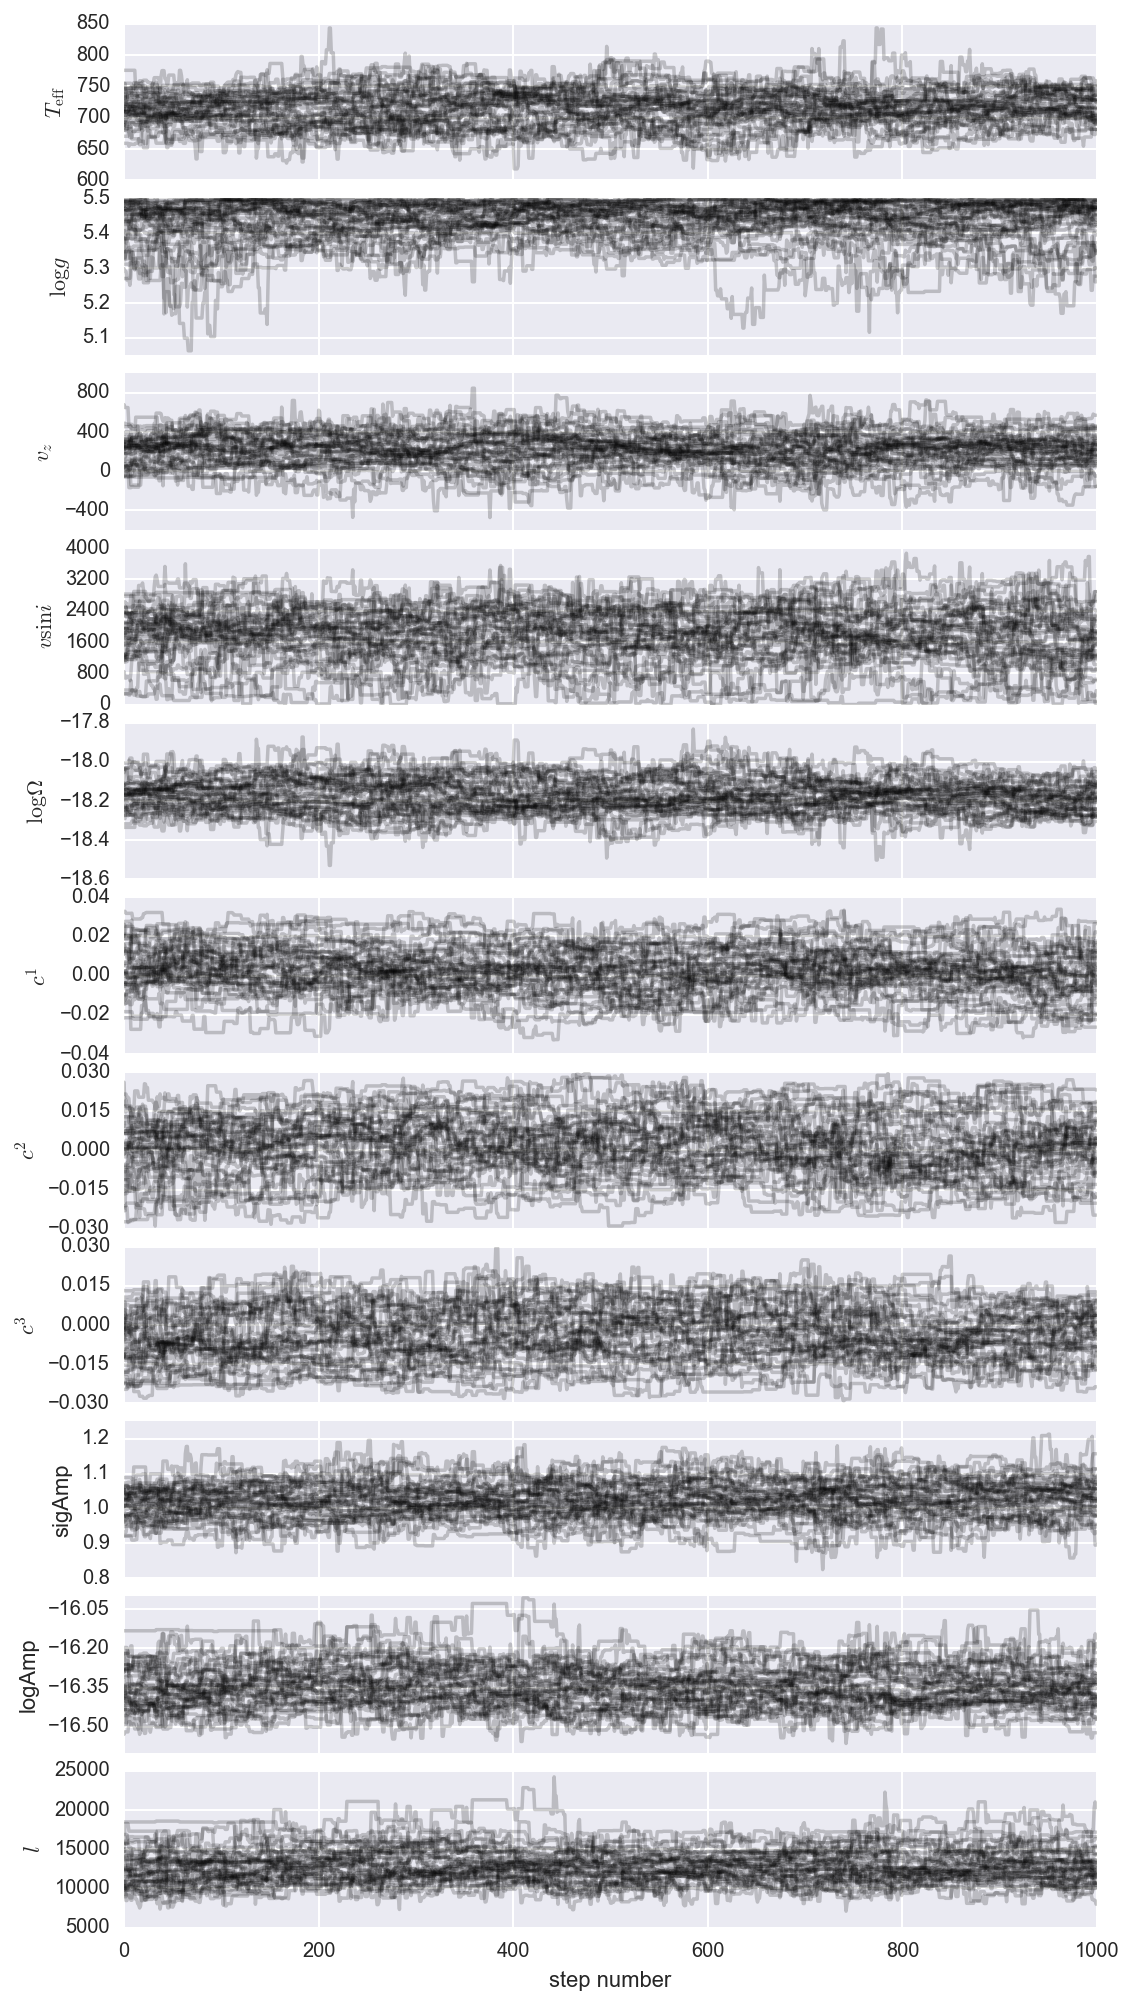

In [5]:
fig, axes = plt.subplots(11, 1, sharex=True, figsize=(8, 14))
for i in range(0, 11, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[10].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

Seems reasonable.

## What is the Cheb spectrum doing, in light of the multi-dimensional prior?

In [6]:
x_vec = np.arange(-1, 1, 0.01)

In [7]:
from numpy.polynomial import Chebyshev as Ch

Plot a bunch of random draws from the Cheb polynomials

In [8]:
n_samples, n_dim = fc.shape
n_draws = 900
rand_i = np.random.randint(0, n_samples, size=n_draws)

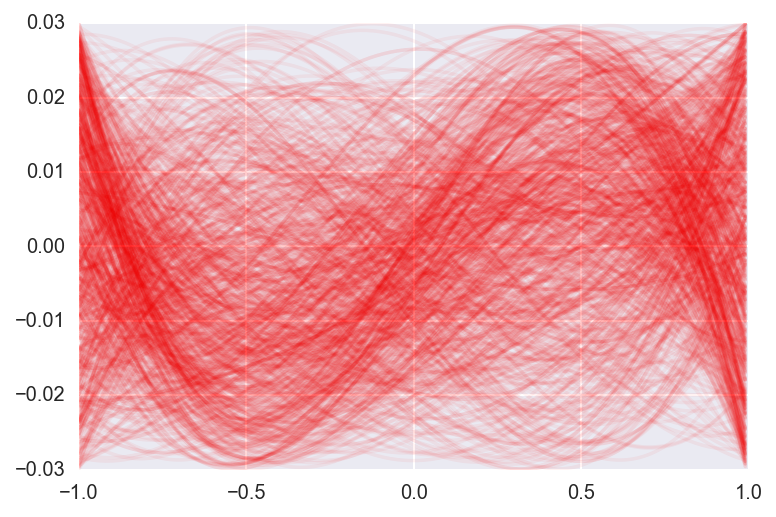

In [9]:
for i in range(n_draws):

    ch_vec = np.array([0]+list(fc[rand_i[i], 5:7+1]))
    ch_tot = Ch(ch_vec)
    ch_spec = ch_tot(x_vec)

    plt.plot(x_vec, ch_spec, 'r', alpha=0.05)

This is probably creating a bias that we don't really want.  We might have to get rid of the Chebyshev polynomials altogether.

## What are we getting compared to *Saumon et al 2006*?

In [10]:
truth_vals = [810.0, 5.15, 0.0, 30.0] # Saumon et al. 2006;  v_z, and vsini made up from plausible values.

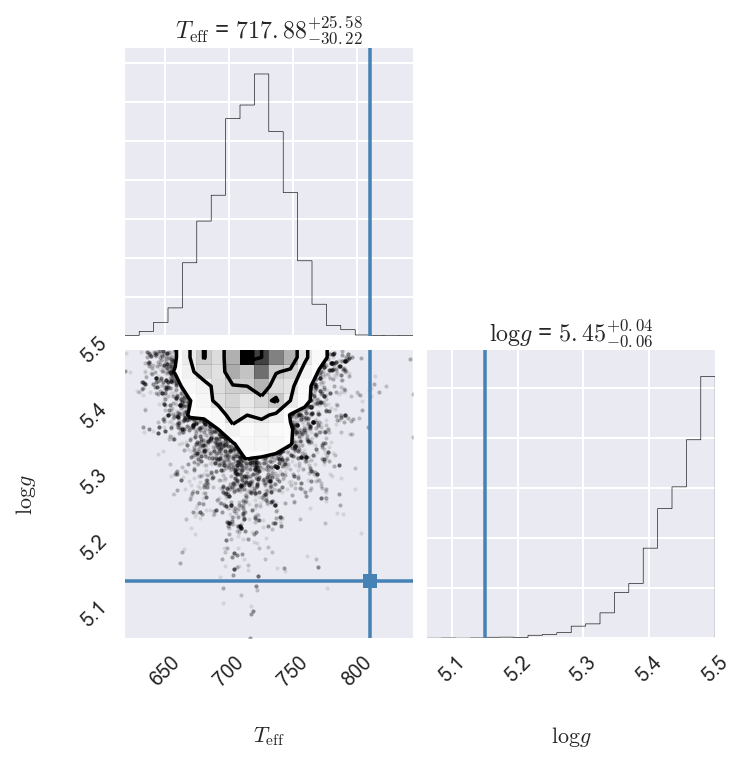

In [11]:
import corner
fig = corner.corner(fc[:, 0:2], labels=label[0:2], show_titles=True, truths=truth_vals[0:2])
fig.savefig('../results/Gl570D_exp1.png', dpi=300)

Systematically off, but maybe not surprisingly so.

## What do the spectra look like?

In [12]:
dat1 = pd.read_csv('../sf/Gl570D/output/marley_grid/run01/spec_config.csv')
dat2 = pd.read_csv('../sf/Gl570D/output/marley_grid/run01/models_draw.csv')

In [13]:
sns.set_style('ticks')

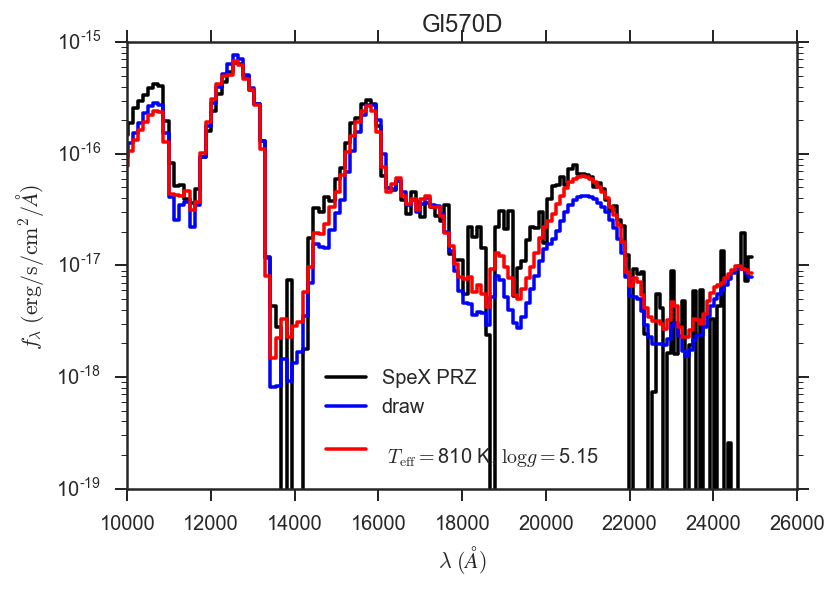

In [14]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')
plt.yscale('log')
plt.savefig('../results/Gl570D_exp1_fit.png', dpi=300, bbox_inches='tight')

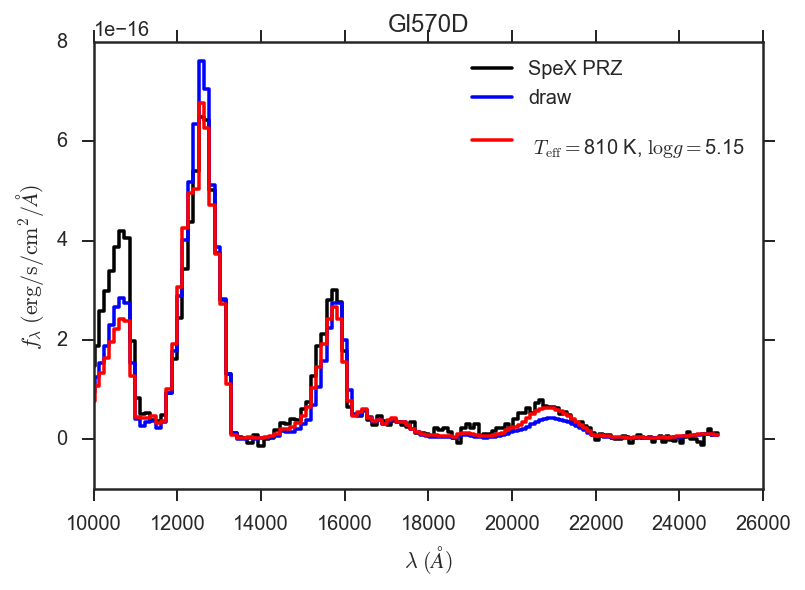

In [15]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')
plt.yscale('linear')

In [16]:
CC = np.load('../sf/Gl570D/output/marley_grid/run01/CC_new.npy')

In [17]:
from scipy.stats import multivariate_normal

In [18]:
#sns.heatmap(CC, xticklabels=False, yticklabels=False)

In [19]:
nz_draw = multivariate_normal(dat2.model_comp50, CC)

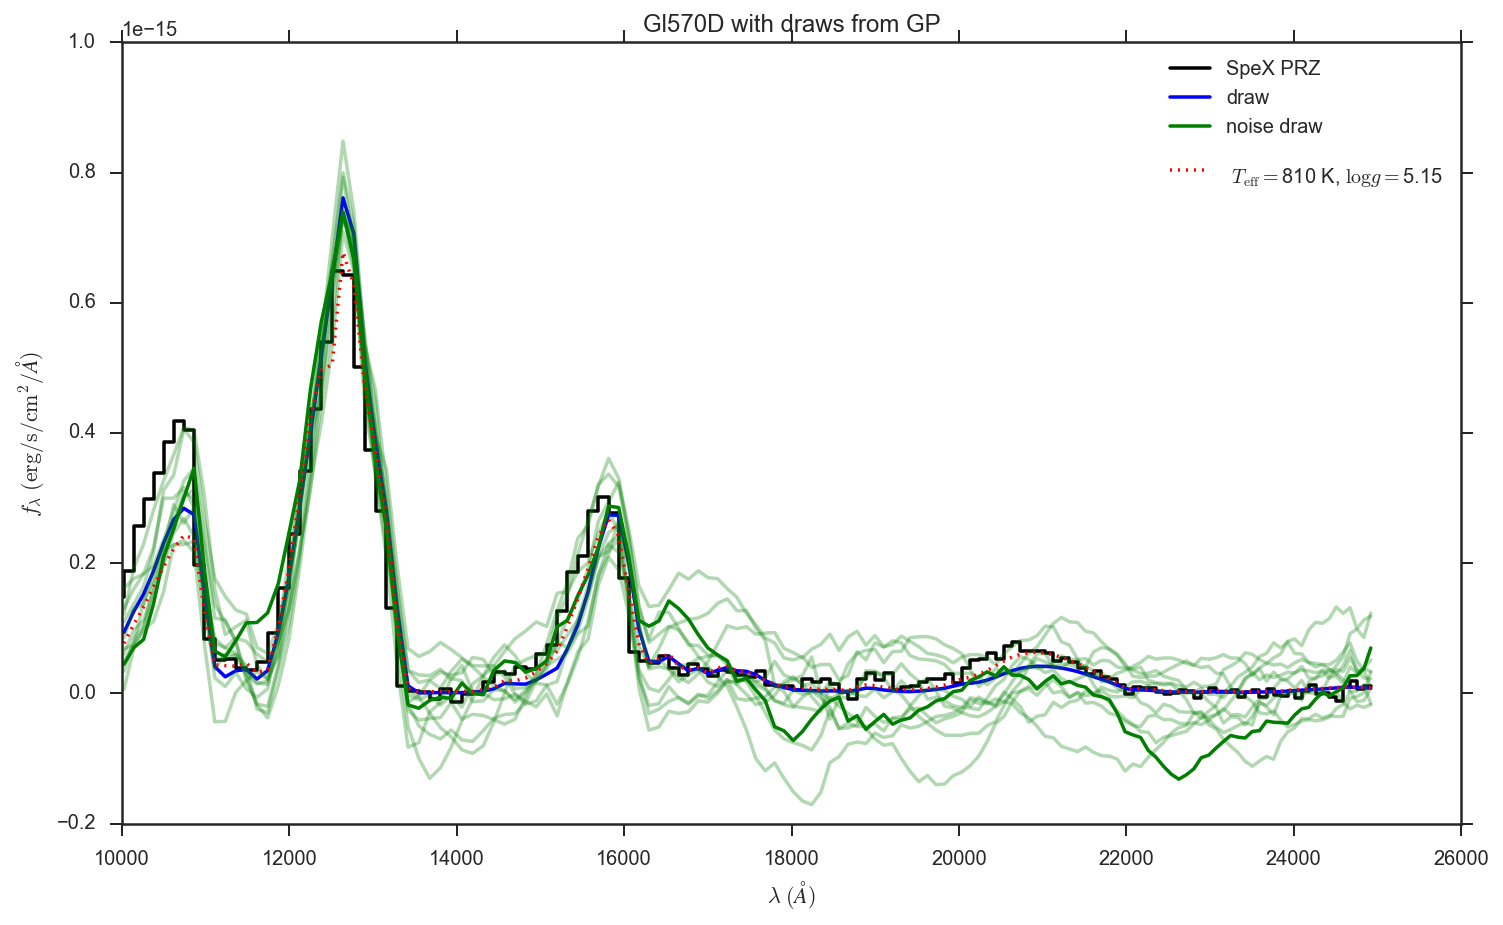

In [20]:
plt.figure(figsize=(12, 7))
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.plot(dat1.wl, dat2.model_comp50, 'b-', label='draw')

plt.plot(dat1.wl, nz_draw.rvs(), 'g-', label='noise draw')
for i in range(10):
    plt.plot(dat1.wl, nz_draw.rvs(), 'g-', alpha=0.3)

plt.plot(dat1.wl, dat1.model_composite, 'r:',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D with draws from GP')
plt.legend(loc='best')
plt.yscale('linear')

The `logAmp` on the Gaussian Process is **way too strong**!  It should be down by a factor of $10\times$.  
It looks like the scale should be smaller by a factor of about $5\times$.  I will change the priors.  
I should also put a prior on the $v_z$ and $v\sin{i}$, or at least re-interpret them as calibration nuisance parameters...  
I also lowered the Cheb variation to a maximum of 1%.

## Next steps:
1. ~~Re-run with adjusted prior on the GP parameters~~
2. Fix and re-instantiate the `part1` of the spectral emulator covariance matrix
3. Make a variation of grid_tools.py that convolves with a wavelength-dependent resolution kernel.
4. Fit with a resolution kernel, not vsini, re-interpret the 4$^{th}$ parameter as $\sigma_R$.
5. Put a prior on $v_z$ equal to a fraction of a pixel.